Chapter 08

# 线性变换
《线性代数》 | 鸢尾花书：数学不难

这段代码的核心目的是**可视化一个二维线性变换** $A \in \mathbb{R}^{2 \times 2}$ 对不同几何对象的作用：包括单位正方形、单位圆、标准基向量、以及整个二维网格的变形，从而帮助理解线性变换如何“拉伸”、“旋转”、“剪切”等操作作用在空间上。

---

我们从数学角度详细解析各部分含义：

---

### 一、输入矩阵 $A$

```python
A = np.array([[1, 2],
              [2, 1]])
```

设定一个线性变换矩阵 $A$，其形式为：

$$
A = \begin{bmatrix} 1 & 2 \\ 2 & 1 \end{bmatrix}
$$

它定义了一个从 $\mathbb{R}^2$ 到 $\mathbb{R}^2$ 的线性映射：$T(\mathbf{x}) = A\mathbf{x}$，其中 $\mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$。

---

### 二、变换整个二维网格

函数 `grid(A)` 用来将一张二维网格变换到新坐标系下：

$$
\text{令 } \mathbf{X}_{\text{grid}} = \{ (x_1, x_2) \mid x_1, x_2 \in [-10, 10] \cap \mathbb{Z} \}
$$

原始网格是所有整数点组成的二维笛卡尔坐标格，经过线性变换后，每一个点都会被变换为：

$$
\mathbf{x}' = A \mathbf{x}
$$

并组成新的图像坐标。变换形式是：

$$
\begin{bmatrix}
x_1' \\
x_2'
\end{bmatrix}
=
\begin{bmatrix}
1 & 2 \\
2 & 1
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
$$

---

### 三、变换单位圆

函数 `circle(A)` 创建单位圆上 $[0, 2\pi]$ 范围内的 $721$ 个点：

$$
\mathbf{x}(\theta) = \begin{bmatrix} \cos \theta \\ \sin \theta \end{bmatrix}, \quad \theta \in [0, 2\pi]
$$

单位圆的所有点满足 $\|\mathbf{x}\|_2 = 1$，即 $x_1^2 + x_2^2 = 1$。

经过线性变换后：

$$
\mathbf{x}'(\theta) = A \mathbf{x}(\theta)
$$

变换后不再是圆，而是一个椭圆，体现了线性变换对方向的非均匀伸缩。

---

### 四、变换单位正方形

函数 `unit_sqaure(A)` 变换单位正方形四个顶点：

$$
\mathbf{x}_i \in \left\{ (0,0), (1,0), (1,1), (0,1) \right\}
$$

变换后成为一个四边形：

$$
\mathbf{x}_i' = A \mathbf{x}_i
$$

从视觉上体现线性变换对形状的“剪切”和“伸缩”。

---

### 五、变换标准基向量与对角向量

函数 `vectors(A)` 考察变换前的以下向量：

- $\mathbf{e}_1 = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$
- $\mathbf{e}_2 = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$
- $\mathbf{e}_1 + \mathbf{e}_2 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$

它们分别经过 $A$ 的作用后变为：

- $A\mathbf{e}_1$
- $A\mathbf{e}_2$
- $A(\mathbf{e}_1 + \mathbf{e}_2)$

这三条向量表示了线性变换在**基向量方向**和**对角方向**的“投影”效果。

---

### 六、可视化：`visualize(A)`

最终绘图过程展示了所有这些被 $A$ 作用后的对象：

1. **网格线的扭曲**，显示空间结构如何变形；
2. **单位圆变为椭圆**，显示变换对不同方向的缩放比；
3. **单位正方形变形为平行四边形**；
4. **坐标轴方向的变换向量**（红为 $A\mathbf{e}_1$，绿为 $A\mathbf{e}_2$，黑为 $A(\mathbf{e}_1 + \mathbf{e}_2)$）；
5. **以原点为中心的坐标系、背景网格、图像坐标轴等辅助结构**，保持图像整洁。

这些对象的线性变换在几何上提供了关于 $A$ 的非常直观的理解，例如是否具有旋转、剪切、拉伸，以及是否可逆（如果变换后没有退化为低维）。


## 初始化

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 自定义函数，网格数据

In [4]:
def grid(A):

    x1_grids = np.arange(-10,10+1)  # 横轴网格点
    x2_grids = np.arange(-10,10+1)  # 纵轴网格点
    xx1, xx2 = np.meshgrid(x1_grids, x2_grids)  # 生成网格
    X_grid = np.stack([xx1, xx2], axis=2)  # 将网格堆叠为3维数组
    A_X_grid = X_grid @ A.T # A线性变换

    return A_X_grid

## 自定义函数，单位圆数据

In [6]:
def circle(A):

    theta_array = np.linspace(0,2*np.pi,721)
    # 极坐标到直角坐标
    x1_array = np.cos(theta_array)
    x2_array = np.sin(theta_array)
    unit_circle = np.column_stack([x1_array,x2_array])

    A_unit_circle = unit_circle @ A.T # A线性变换

    return A_unit_circle

## 自定义函数，单位正方形数据

In [8]:
def unit_square(A):
    unit_square = np.array([[0, 0],
                            [1, 0],
                            [1, 1],
                            [0, 1]])

    A_unit_square = unit_square @ A.T # A线性变换
    return A_unit_square

## 自定义函数，三个列向量

In [10]:
def vectors(A):
    e1 = np.array([[1],
                   [0]])
    Ae1 = A@e1 # A线性变换

    e2 = np.array([[0],
                   [1]])
    Ae2 = A@e2 # A线性变换

    all_1 = e1 + e2
    A_all_1 = A@all_1 # A线性变换

    return Ae1, Ae2, A_all_1

## 定义可视化函数

In [12]:
def visualize(A):
    fig, ax = plt.subplots()  

    # 调用自定义函数创建数据
    A_X_grid = grid(A)
    A_unit_square = unit_square(A)
    A_unit_circle = circle(A)
    Ae1,Ae2,A_all_1 = vectors(A)

    # 绘制变换后的网格
    for i in range(A_X_grid.shape[0]):
        plt.plot(A_X_grid[i, :, 0], 
                 A_X_grid[i, :, 1], 
                 'k-', linewidth=0.5)  # 绘制网格行
    for j in range(A_X_grid.shape[1]):
        plt.plot(A_X_grid[:, j, 0], 
                 A_X_grid[:, j, 1], 
                 'k-', linewidth=0.5)  # 绘制网格列
    
    # 绘制变换后的列向量
    plt.quiver(0, 0, Ae1[0], Ae1[1], 
               angles='xy', scale_units='xy', 
               scale=1, color=[1, 0, 0], zorder = 1e5)
    plt.quiver(0, 0, Ae2[0], Ae2[1], 
               angles='xy', scale_units='xy', 
               scale=1, color=[0, 1, 0], zorder = 1e5)
    plt.quiver(0, 0, A_all_1[0], A_all_1[1], 
               angles='xy', scale_units='xy', 
               scale=1, color=[0, 0, 0], zorder = 1e5)

    # 绘制变换后单位圆
    plt.plot(A_unit_circle[:,0],A_unit_circle[:,1], c = 'k', ls = '--')

    # 绘制变换后单位正方形
    plt.fill(A_unit_square[:,0],A_unit_square[:,1], c = '#FFFFCC', ls = '--', zorder = 1)

    # 装饰
    plt.axvline(x=0, color='k', zorder=0)
    plt.axhline(y=0, color='k', zorder=0)
    ax.tick_params(axis='both', which='both', length=0, labelbottom=False, labelleft=False)
    ax.set_aspect(1)
    lim = 3; ax.set_xlim([-lim, lim]); ax.set_ylim([-lim, lim])
    plt.xticks(np.arange(-lim, lim)); plt.yticks(np.arange(-lim, lim))
    ax.grid(linestyle='--', linewidth=0.15, color=[0.8, 0.8, 0.8])  # 添加网格

## 可视化

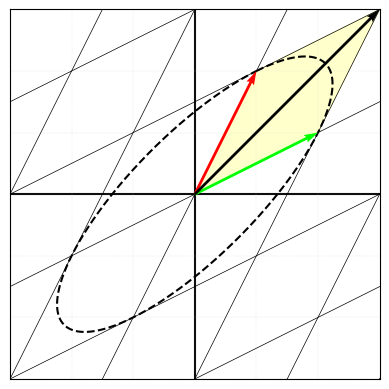

In [14]:
A = np.array([[1, 2],
              [2, 1]])
visualize(A)